# Subsetting vs clipping

Two types of spatial operators: 
- boolean, eg. `.intersects`
- geometry-generating, eg. `intersection`

>Example of subsetting points by polygons, in which case both methods can be used
>
>Subset points covered by circks x and y.

In [5]:
import shapely
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
import geopandas as gpd

In [6]:
x = shapely.Point((0, 0)).buffer(1)
y = shapely.Point((1, 0)).buffer(1)

In [7]:
bounds = x.union(y).bounds
bounds

(-1.0, -1.0, 2.0, 1.0)

In [9]:
np.random.seed(1)
n = 10 
coords_x = np.random.uniform(bounds[0], bounds[2], n) 
coords_y = np.random.uniform(bounds[1], bounds[3], n)
coords = list(zip(coords_x, coords_y))
coords

[(0.2510660141077219, -0.1616109711934104),
 (1.1609734803264744, 0.370439000793519),
 (-0.9996568755479653, -0.5910955005369651),
 (-0.0930022821044807, 0.7562348727818908),
 (-0.5597323275486609, -0.9452248136041477),
 (-0.7229842156936066, 0.34093502035680445),
 (-0.4412193658669873, -0.16539039526574606),
 (0.03668218112914312, 0.11737965689150331),
 (0.1903024226920098, -0.7192261228095325),
 (0.6164502020100708, -0.6037970218302424)]

In [10]:
pnt = [shapely.Point(i) for i in coords]
pnt = gpd.GeoSeries(pnt)

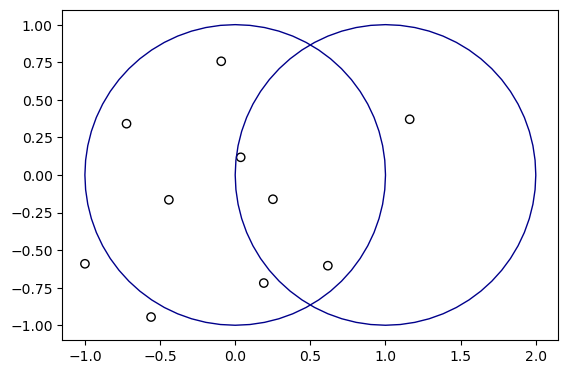

In [11]:
ax = pnt.plot(color='none', ec='k')
gpd.GeoSeries(x).plot(ax=ax, color='none', ec='darkblue')
gpd.GeoSeries(y).plot(ax=ax, color='none', ec='darkblue');

>Now subset the points to only return those in the intersection of x and y
>
>Two methods described, the second returns all rows even if empty

In [12]:
# Method 1
sel = pnt.intersects(x.intersection(y))
pnt1 = pnt[sel] 
pnt1

0    POINT (0.25107 -0.16161)
7     POINT (0.03668 0.11738)
9     POINT (0.61645 -0.6038)
dtype: geometry

In [13]:
# Method 2
pnt2 = pnt.intersection(x.intersection(y))
pnt2

0    POINT (0.25107 -0.16161)
1                 POINT EMPTY
2                 POINT EMPTY
3                 POINT EMPTY
4                 POINT EMPTY
5                 POINT EMPTY
6                 POINT EMPTY
7     POINT (0.03668 0.11738)
8                 POINT EMPTY
9     POINT (0.61645 -0.6038)
dtype: geometry

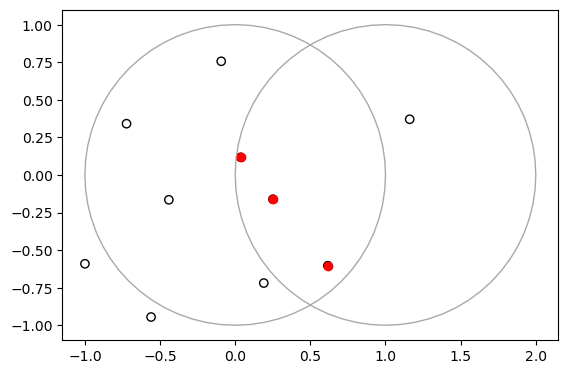

In [14]:
base = pnt.plot(color='none', edgecolor='black')
gpd.GeoSeries(x).plot(ax=base, color='none', edgecolor='darkgrey');
gpd.GeoSeries(y).plot(ax=base, color='none', edgecolor='darkgrey');
pnt2.plot(ax=base, color='red');